In [6]:
from caik import cai
import skrf as rf
%matplotlib inline
key = cai.CAI(start = True, resolution = 20)
key.esp.current_axis = 2

# ITO Calibration

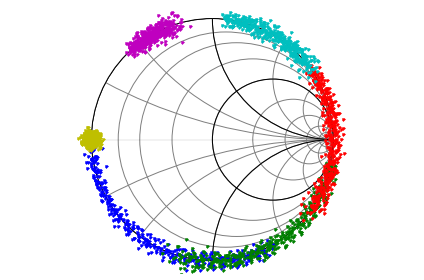

In [3]:
ito_cal = key.take_simple_cal()

In [5]:
key.zva.write_data('ito_ntwk')

In [7]:
ito = rf.Network('ito_ntwk.s1p')
ito_caled = ito_cal.apply_cal(ito)
ito_caled.name = ito.name + ' corrected'

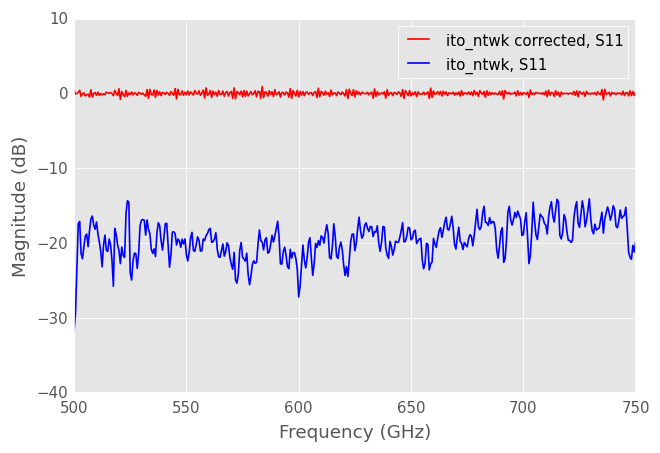

In [11]:
ito_caled.plot_s_db(color = 'r')
ito.plot_s_db(color = 'b')
rf.stylely()

# Introduce Silicon (350 um)
# Calibration with ITO
### First: Projector OFF

In [83]:
key.zva.write_data('off')

In [84]:
off = rf.Network('off.s1p')
off_caled = ito_cal.apply_cal(off)
off_caled.name = off.name + ' corrected'

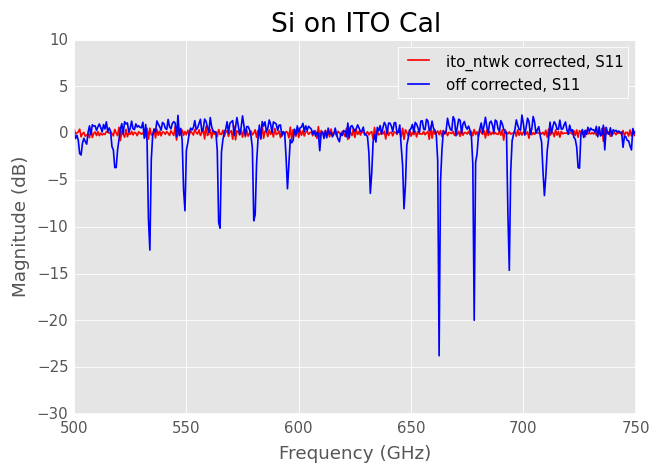

In [85]:
ito_caled.plot_s_db(color = 'r', title = 'Si on ITO Cal')
off_caled.plot_s_db(color = 'b')
rf.stylely()

### Second: Dark and Flood Illumination
#### Projector on but black

In [86]:
key.zva.write_data('dark')

In [87]:
dark = rf.Network('dark.s1p')
dark_caled = ito_cal.apply_cal(dark)
dark_caled.name = dark.name + ' corrected'

#### Projector full on

In [88]:
key.zva.write_data('flood')

In [89]:
flood = rf.Network('flood.s1p')
flood_caled = ito_cal.apply_cal(flood)
flood_caled.name = flood.name + ' corrected'

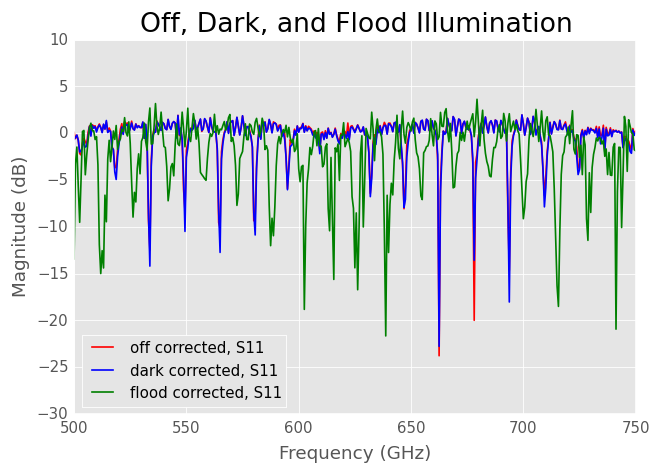

In [90]:
off_caled.plot_s_db(color = 'r', title = 'Off, Dark, and Flood Illumination')
dark_caled.plot_s_db(color = 'b')
flood_caled.plot_s_db(color = 'g')

# Calibration with Si (projector off)

In [93]:
key.zva.write_data('si_off')

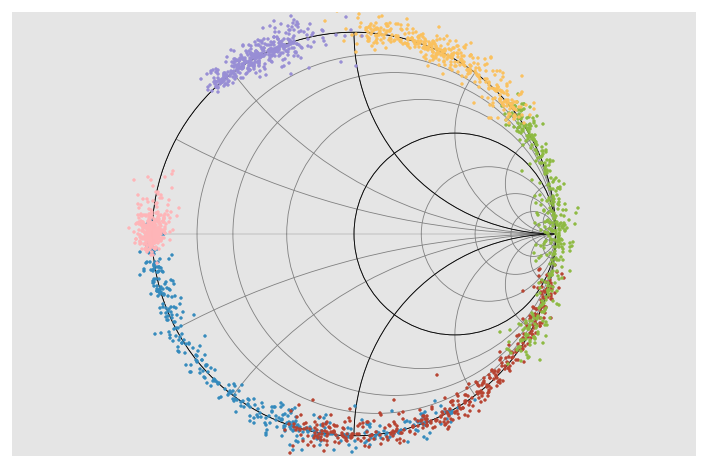

In [94]:
si_cal = key.take_simple_cal()

In [95]:
si_off = rf.Network('si_off.s1p')
si_off_caled = si_cal.apply_cal(si_off)
si_off_caled.name = si_off.name + ' corrected'

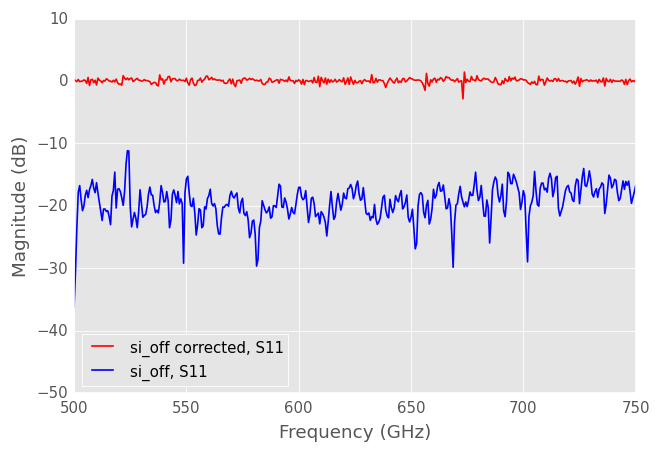

In [96]:
si_off_caled.plot_s_db(color = 'r')
si_off.plot_s_db(color = 'b')

# Zoom in on a smaller band (630 - 650 GHz)

## ITO Calibration

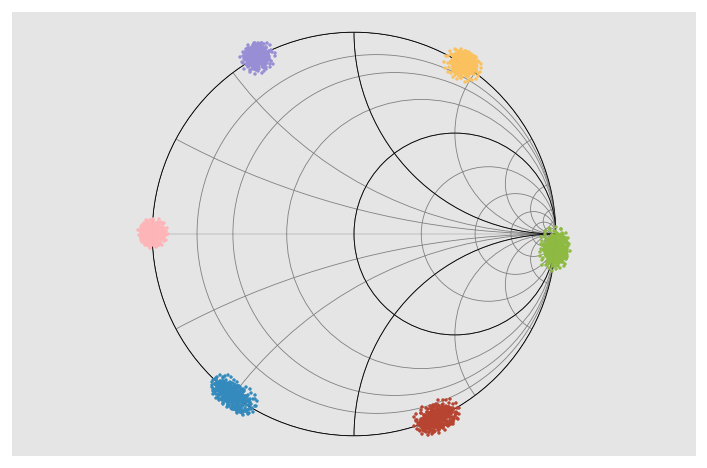

In [21]:
ito_20_cal = key.take_simple_cal()

In [22]:
key.zva.write_data('ito_20_ntwk')

In [23]:
ito_20 = rf.Network('ito_20_ntwk.s1p')
ito_20_caled = ito_20_cal.apply_cal(ito_20)
ito_20_caled.name = ito_20.name + ' corrected'

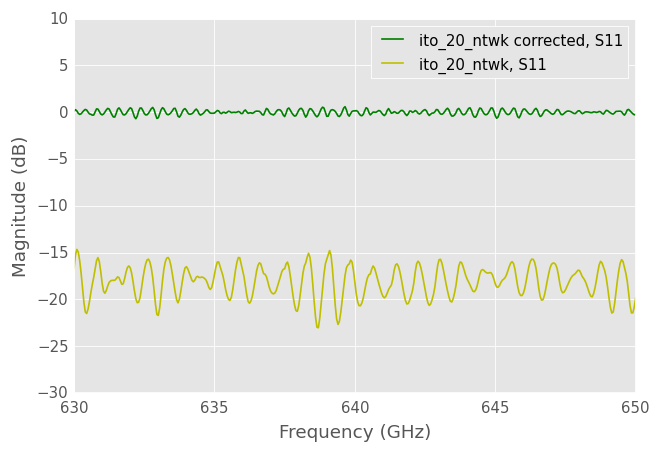

In [25]:
ito_20_caled.plot_s_db(color = 'g')
ito_20.plot_s_db(color = 'y')
rf.stylely()

# With 350 um High-R Silicon Chip

### Projector OFF

In [28]:
key.zva.write_data('off_20')

In [29]:
off_20 = rf.Network('off_20.s1p')
off_20_caled = ito_20_cal.apply_cal(off_20)
off_20_caled.name = off_20.name + ' corrected'

### Projector Dark

In [30]:
key.zva.write_data('dark_20')

In [31]:
dark_20 = rf.Network('dark_20.s1p')
dark_20_caled = ito_20_cal.apply_cal(dark_20)
dark_20_caled.name = dark_20.name + ' corrected'

### Projector ON (Full Illumination)

In [32]:
key.zva.write_data('flood_20')

In [33]:
flood_20 = rf.Network('flood_20.s1p')
flood_20_caled = ito_20_cal.apply_cal(flood_20)
flood_20_caled.name = flood_20.name + ' corrected'

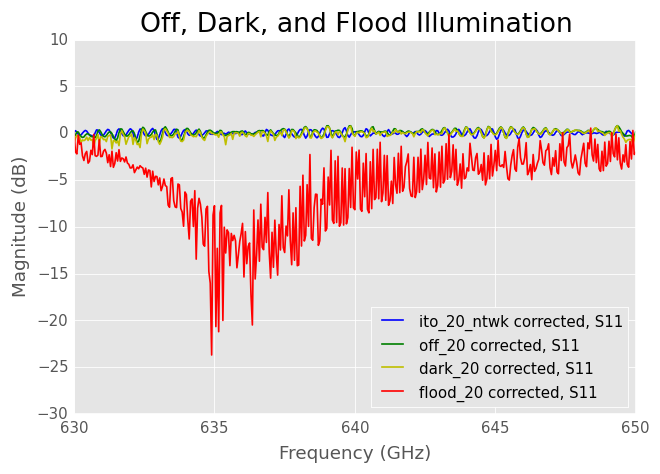

In [34]:
ito_20_caled.plot_s_db(color = 'b', title = 'Off, Dark, and Flood Illumination')
off_20_caled.plot_s_db(color = 'g')
dark_20_caled.plot_s_db(color = 'y')
flood_20_caled.plot_s_db(color = 'r')

# Test Calibration with Si

OnePort Calibration: '', 630-650 GHz, 401 pts, 6-standards

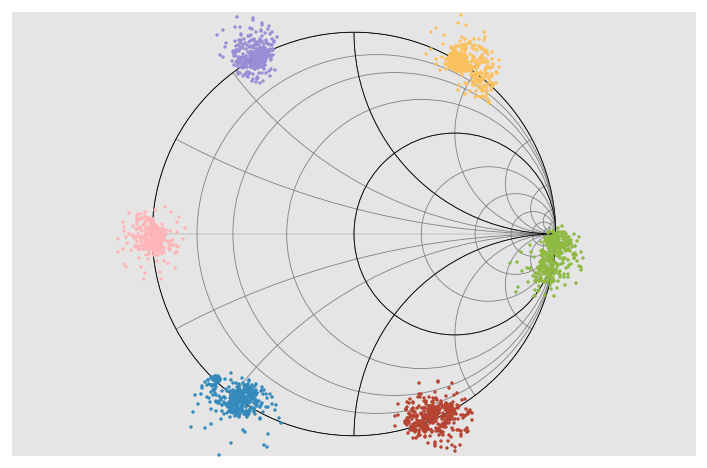

In [36]:
key.take_simple_cal()

# Summary
It is possible to get about 15-20 dB difference in reflection magnitude on certain frequencies by exciting carriers on the surface of a high resistivity 350 um thick Si chip.